### Climate Model Simulation Crashes Data Set 

In [209]:
# Libraries 

import os
import pickle
import numpy as np
import pandas as pd
import numpy.linalg as npla
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import deque
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier as KNC


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet ,LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, zero_one_loss
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score,GridSearchCV, RandomizedSearchCV, cross_val_score
%matplotlib inline

In [96]:
# loading R 
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [23]:
%%R
# Reading the data set 
library(data.table)
dataset<-read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/00252/pop_failures.dat", 
           header=TRUE)
# writing the data set 
write.csv(dataset, file = "climate.csv")

In [145]:
#reading the dataset 

climate_data=pd.read_csv('climate.csv')
X = climate_data.iloc[:,3:20].values
y = climate_data['outcome'].values

# Splitting the dataset in 25% train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [146]:
print(X.shape)
print(y.shape)

(540, 17)
(540,)


In [147]:
climate_data.head()

,Unnamed: 0,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,2,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,3,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,4,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,5,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


#### Some initial data analysis 

In [148]:
climate_data['outcome'].sum()

494

#### Step 1                                        Visualize the data 


In [ ]:
#vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,
#ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,
#vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome

#### Step 2 Model 1  DT classifier 


In [155]:
## Decision Trees for cancer

#We'll start just by training a single decision tree.

error_rate_testing_sciktlearn_cancer_decisiontree=[]

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

## Prediction and Evaluation 

#Let's evaluate our decision tree.
predictions_dt_climate = dtree.predict(X_test)

Test_error_climate_dt=zero_one_loss(y_test,predictions_dt_climate)
Accuracy_test_climate_dt=1-Test_error_cancer_dt

#print('Test error for decision tree for climate data  = %f' % Test_error_climate_dt)
print('Test Accuracy for decision tree for climate data  = %f' % Accuracy_test_climate_dt)

Test Accuracy for decision tree for climate data  = 0.874074


In [153]:
predictions_dt_climate.shape

(135,)

#### Step 3 Model 2 random Forest 

In [156]:
# random forest model 

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
smse = sum(rfc_pred != y_test) / len(y_test)

Accuracy = 1-smse

#print('Test error = %f' % smse)
print('Accuracy = %f' % Accuracy)

Accuracy = 0.918519


In [157]:
rfc.score(X_test,y_test)

0.91851851851851851

#### Step 4 Model 3 Cross Validation 

In [126]:
n_estimators = [100,200,1000]
max_depth = [2,5,8,10]
max_features = [1,5,8,10,12,15]
results = pd.DataFrame(columns=['n_estimators','max_depth','max_features','mean_score'])

for n in n_estimators:
    for m in max_depth:
        for f in max_features:
            clf = RFC(n_estimators=n,max_depth=m,max_features=f,criterion='entropy')
            scores = cross_val_score(clf,X,y,cv=5)
            results = results.append({'n_estimators':n,'max_depth':m,'max_features':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False)

,n_estimators,max_depth,max_features,mean_score
44,200.0,10.0,8.0,0.948181
35,200.0,5.0,15.0,0.948181
46,200.0,10.0,12.0,0.948164
70,1000.0,10.0,12.0,0.946329
59,1000.0,5.0,15.0,0.946329
33,200.0,5.0,10.0,0.946329
9,100.0,5.0,10.0,0.946329
20,100.0,10.0,8.0,0.946329
17,100.0,8.0,15.0,0.946329
14,100.0,8.0,8.0,0.946329


#### Step 5 Model 4 Backward selection using  L1 and L2 penealty  

In [203]:
#penalty l1
model_l1 = LogisticRegression(penalty = 'l1')

# Fitting the model 
model_l1.fit(X_train,y_train)

pred = model_l1.predict(X_test)

# coefficient calculation and error calculation 

sf_model = np.sum(model_l1.coef_/max(model_l1.coef_) >= 1e-6)
v_error = np.mean(model_l1.predict(X_test) != y_test)

accuracy = np.mean(pred==y_test)
# printing the features, and error

print(' L1 regularization: no of features ', sf_model)
print(' L1 regularization: error ', accuracy)

 L1 regularization: no of features  12
 L1 regularization: error  0.955555555556


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()


In [205]:
model_l1.coef_

array([[-4.48289529, -4.38849205,  0.        ,  1.13591588,  1.55448867,
         0.50366527,  0.        ,  0.04760432,  0.25163128, -0.1593905 ,
         0.        ,  0.        , -2.88605803,  2.36634888,  0.        ,
         1.32179841,  1.00965738]])

In [204]:
#penalty l1

model_l2 = LogisticRegression(penalty = 'l2')

# Fitting the model 
model_l2.fit(X_train,y_train)

pred = model_l2.predict(X_test)

# coefficient calculation and error calculation 

sf_model = np.sum(model_l2.coef_/max(model_l1.coef_) >= 1e-6)
v_error = np.mean(model_l2.predict(X_test) != y_test)

accuracy = np.mean(pred==y_test)
# printing the features, and error

print(' L2 regularization: no of features ', sf_model)
print(' L2 regularization: error ', accuracy)

 L2 regularization: no of features  16
 L2 regularization: error  0.940740740741


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [206]:
model_l2.coef_

array([[ -2.64883439e+00,  -2.52086837e+00,   2.01468085e-03,
          1.19117186e+00,   1.35121467e+00,   8.00429543e-01,
          3.23026739e-01,   4.92359467e-01,   7.54589028e-01,
         -3.03693666e-01,   2.35828292e-01,  -5.41674959e-02,
         -1.96728467e+00,   1.89172736e+00,   5.95516642e-03,
          1.24863310e+00,   1.05562686e+00]])

In [211]:
# make an empty list to hold train error, and one to hold test error

trainer = list()
valerr = list()
penalty=['l1','l2']
C = np.arange(1,3,0.1)

# make an array of the number of features to sweep through

feats = np.arange(1,17)

# loop over the features, and fit the model each time
# also calculate train and test error

for p in penalty:
    for c in C:
        for f in feats:
            rfe = RFE(estimator = Ridge(), n_features_to_select = f)
            rfe.fit(X_train, y_train)
            Xtrain_sel = X_train[:,rfe.support_]
            Xvalidate_sel = X_test[:,rfe.support_]
            model_l1 = LogisticRegression(penalty = p,C=c)
            model_l1.fit(Xtrain_sel,y_train)
            
            v_error_l1 = np.mean(model_l1.predict(Xvalidate_sel) != y_test)
            train_error_l1 = np.mean(model_l1.predict(Xtrain_sel) != y_train)
            
            trainer.append(train_error_l1)
            valerr.append(v_error_l1)
            
            results = results.append({'penalty':p,'C':c,'features':f,'training error ':trainer.append(train_error_l1)},
                                     ignore_index=True)

# coefficient calculation and error calculation 

    #sf_model_l2 = np.sum(model_l2.coef_/max(model_l2.coef_) >= 1e-6)
           

In [216]:
results

,n_neighbors,mean_score,C,features,penalty,training error
0,1.0,0.885147,NaN,NaN,NaN,NaN
1,2.0,0.866629,NaN,NaN,NaN,NaN
2,3.0,0.931497,NaN,NaN,NaN,NaN
3,4.0,0.933399,NaN,NaN,NaN,NaN
4,5.0,0.931513,NaN,NaN,NaN,NaN
5,6.0,0.933417,NaN,NaN,NaN,NaN
6,7.0,0.929662,NaN,NaN,NaN,NaN
7,8.0,0.931514,NaN,NaN,NaN,NaN
8,9.0,0.924089,NaN,NaN,NaN,NaN
9,10.0,0.924089,NaN,NaN,NaN,NaN


In [ ]:
#### Ref : https://github.com/ubcs3/2017-Fall/blob/master/notes-2017-10-13/notes-2017-10-13-ideas.ipynb

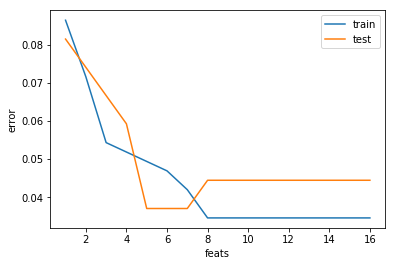

In [196]:


# make an empty list to hold train error, and one to hold test error
trainer = list()
valerr = list()

# make an array of the number of features to sweep through
feats = np.arange(1,17)

# loop over the features, and fit the model each time
# also calculate train and test error
for f in feats:
    rfe = RFE(estimator = Ridge(), n_features_to_select = f)
    rfe.fit(X_train, y_train)
    Xtrain_sel = X_train[:,rfe.support_]
    Xvalidate_sel = X_test[:,rfe.support_]
    
    model_l2 = LogisticRegression(penalty = 'l1')

    # Fitting the model 
    model_l2.fit(Xtrain_sel,y_train)

# coefficient calculation and error calculation 

    #sf_model_l2 = np.sum(model_l2.coef_/max(model_l2.coef_) >= 1e-6)
    v_error_l2 = np.mean(model_l2.predict(Xvalidate_sel) != y_test)
    train_error_l2 = np.mean(model_l2.predict(Xtrain_sel) != y_train)
    
    
    trainer.append(train_error_l2)
    valerr.append(v_error_l2)
      
    
       # plot validation loss
plt.plot(np.arange(1,17), trainer, label="train")
plt.plot(np.arange(1,17), valerr, label="test")
plt.xlabel("feats")
plt.ylabel("error")
plt.legend()
plt.show()

### Step 6 Model 5 CV using L1 and L2 penealty

In [207]:
penalty = ['l2','l1']
C = np.arange(1,3,0.1)
fit_intercept = [True,False]
results = pd.DataFrame(columns=['penalty','C','fit_intercept','mean_score'])

for p in penalty:
    for c in C:
        for f in fit_intercept:
            reg = LogisticRegression(penalty=p,C=c,fit_intercept=f)
            scores = cross_val_score(reg,X,y,cv=5)
            results = results.append({'penalty':p,'C':c,'fit_intercept':f,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(10)

,penalty,C,fit_intercept,mean_score
70,l1,2.5,True,0.961144
72,l1,2.6,True,0.961144
66,l1,2.3,True,0.961144
60,l1,2.0,True,0.961144
68,l1,2.4,True,0.961144
64,l1,2.2,True,0.961144
62,l1,2.1,True,0.961144
54,l1,1.7,True,0.959293
56,l1,1.8,True,0.959293
74,l1,2.7,True,0.959293


#### K-nearest neighbors

In [210]:
n_neighbors = range(1,20)
results = pd.DataFrame(columns=['n_neighbors','mean_score'])

for n in n_neighbors:
    clf = KNC(n_neighbors=n)
    scores = cross_val_score(clf,X,y,cv=5)
    results = results.append({'n_neighbors':n,'mean_score':scores.mean()},ignore_index=True)
    
results.sort_values(by='mean_score',ascending=False).head(10)

,n_neighbors,mean_score
5,6.0,0.933417
3,4.0,0.933399
7,8.0,0.931514
4,5.0,0.931513
2,3.0,0.931497
6,7.0,0.929662
9,10.0,0.924089
8,9.0,0.924089
10,11.0,0.920402
11,12.0,0.918550


In [ ]:
# .cient of model which are not zero are selected ....print out the coefficient and check values 

# which features are good to predict 

# binary ...how balance is your data ...and talk about that 

# visualizatiob on bar graph 